# **Praktikum IV Machine Learning**



---

Nama  : Lutfiah Firlian

NPM : F1F022025


---


## **Latar Belakang**

Dalam era big data dan kecerdasan buatan saat ini, kebutuhan akan model prediksi yang akurat dan stabil semakin meningkat. Pendekatan tradisional dalam machine learning sering kali bergantung pada penggunaan satu algoritma tunggal (single model) untuk menyelesaikan tugas klasifikasi maupun regresi. Namun, model tunggal sering kali menghadapi kendala signifikan, seperti kecenderungan mengalami overfitting (varian tinggi) atau underfitting (bias tinggi) ketika dihadapkan pada data yang kompleks dan penuh noise (Zhou, 2012). Untuk mengatasi keterbatasan ini, paradigma Ensemble Learning dikembangkan sebagai solusi yang memanfaatkan kekuatan kolektif dari berbagai model.

Ensemble Learning adalah metode yang melatih beberapa model pembelajaran (base learners) dan menggabungkan hasil prediksinya untuk mendapatkan performa yang lebih baik daripada model individu mana pun (Dietterich, 2000). Secara umum, terdapat empat pendekatan utama dalam Ensemble Learning yang sering diaplikasikan, yaitu Voting, Bagging, Boosting, dan Stacking.

Metode pertama adalah Voting, yang merupakan teknik paling intuitif dalam penggabungan model. Polikar (2006) menjelaskan bahwa voting bekerja dengan mengambil keputusan berdasarkan mayoritas suara (hard voting) atau rata-rata probabilitas (soft voting) dari berbagai model yang berbeda. Pendekatan ini efektif untuk menyeimbangkan kesalahan individu antar model yang memiliki karakteristik berbeda.

Metode kedua adalah Bagging (Bootstrap Aggregating), yang diperkenalkan oleh Breiman (1996). Teknik ini bertujuan utama untuk mengurangi varians dan mencegah overfitting dengan cara melatih model-model secara paralel menggunakan sampel data acak yang berbeda (bootstrap samples). Algoritma Random Forest adalah implementasi paling sukses dari konsep ini, di mana kumpulan pohon keputusan digabungkan untuk menghasilkan prediksi yang stabil.

Metode ketiga, Boosting, mengambil pendekatan yang berbeda dengan bekerja secara sekuensial. Menurut Freund dan Schapire (1996), Boosting berfokus pada pengurangan bias dengan cara melatih model baru untuk memperbaiki kesalahan yang dibuat oleh model sebelumnya. Friedman (2001) kemudian mengembangkan konsep ini lebih lanjut melalui Gradient Boosting, di mana model belajar dari residual error model sebelumnya, menjadikannya salah satu algoritma paling kuat untuk data tabular saat ini.

Metode keempat adalah Stacking (Stacked Generalization). Berbeda dengan voting sederhana, Stacking menggunakan meta-learner untuk mempelajari cara terbaik mengombinasikan prediksi dari berbagai model dasar (Wolpert, 1992). Dalam arsitektur ini, prediksi dari model tingkat pertama dijadikan sebagai fitur input bagi model tingkat kedua untuk menghasilkan keputusan akhir yang optimal.

Berdasarkan literatur standar statistik dan pembelajaran mesin, penggunaan teknik ensemble terbukti secara teoritis dan empiris mampu meningkatkan kemampuan generalisasi model pada data baru (Hastie et al., 2009). Oleh karena itu, penelitian ini akan menerapkan dan membandingkan kinerja keempat metode tersebut untuk mendapatkan model klasifikasi yang paling optimal pada dataset yang digunakan.

---



## **Rumusan Masalah**

Adapun rumusan masalah pada laporan kali ini adalah sebagai berikut:


1.   Bagaimana konsep dasar Random Forest?
2.   Bagaimana mengimplementasikan Random Forest untuk klasifikasi dan regresi menggunakan scikit-learn?
3. Bagaimana melakukan evaluasi model menggunakan metrik performa?
4. Bagaimana menginterpretasikan hasil pemodelan?


---



## **Tujuan Penelitian**

Adapun tujuan pada laporan kali ini adalah sebagai berikut:
1.   Menjelaskan konsep dasar Random Forest.
2.   Mengimplementasikan Random Forest untuk klasifikasi dan regresi menggunakan scikit-learn.
3. Melakukan evaluasi model menggunakan metrik performa.
4. Menginterpretasikan hasil pemodelan.


---



### **Mengimpor _Libraries_**

Berikut merupakan _library_ yang akan digunakan dalam _notebook_ ini:

In [275]:
!pip install feature_engine

In [276]:
# Install library imbalanced-learn (jika belum ada)
try:
    import imblearn
except ImportError:
    !pip install imbalanced-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    VotingClassifier,
    StackingClassifier,
    AdaBoostClassifier
)

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

# Settings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

print("✅ Library berhasil di-import.")

✅ Library berhasil di-import.




---


## **Memuat Data**





In [277]:
url = "https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/mental_health_dataset.csv"

# Membaca CSV dengan pemisah titik koma
df = pd.read_csv(url, sep=';')

print(f"Ukuran Awal Data: {df.shape}")

# Daftar kolom yang ingin dibuang
cols_to_drop = ['Timestamp', 'comments']

# Hapus kolom (errors='ignore' mencegah error jika kolom tidak ditemukan)
df_clean = df.drop(columns=cols_to_drop, errors='ignore')

print(f"Ukuran Setelah Cleaning: {df_clean.shape}")
print("\nContoh 5 Baris Data Teratas:")

# Menampilkan 5 baris teratas DataFrame
display(df_clean.head())

Ukuran Awal Data: (10000, 13)
Ukuran Setelah Cleaning: (10000, 13)

Contoh 5 Baris Data Teratas:


,age,gender,employment_status,work_environment,mental_health_history,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,Male,Employed,On-site,Yes,6,6.2,3,28,17,54,59.7,High
1,46,Female,Student,On-site,No,10,9.0,4,30,11,85,54.9,High
2,32,Female,Employed,On-site,Yes,7,7.7,2,24,7,62,61.3,Medium
3,60,Non-binary,Self-employed,On-site,No,4,4.5,4,6,0,95,97.0,Low
4,25,Female,Self-employed,On-site,Yes,3,5.4,0,24,12,70,69.0,High




---


## **Analisis Data Eksploratif**





In [278]:
print("=== 1. STATISTIK NUMERIK (Rata-rata, Std, Min, Max) ===")
display(df[numeric_cols].describe().T)

print("\n=== 2. STATISTIK KATEGORIKAL (Unik, Modus) ===")
if len(categorical_cols) > 0:
    display(df[categorical_cols].describe().T)

print("\n=== 3. PERBANDINGAN TARGET (mental_health_risk) ===")
target_counts = df['mental_health_risk'].value_counts()
target_persen = df['mental_health_risk'].value_counts(normalize=True) * 100

print("Jumlah Data:")
print(target_counts)
print("\nPersentase:")
print(target_persen)

=== 1. STATISTIK NUMERIK (Rata-rata, Std, Min, Max) ===


,count,mean,std,min,25%,50%,75%,max
age,10000.0,41.55760,13.749581,18.0,30.0,41.5,53.0,65.0
stress_level,10000.0,5.57200,2.887741,1.0,3.0,6.0,8.0,10.0
sleep_hours,10000.0,6.47300,1.473944,3.0,5.5,6.5,7.5,10.0
physical_activity_days,10000.0,3.50570,2.282737,0.0,2.0,4.0,5.0,7.0
depression_score,10000.0,15.03990,8.990839,0.0,7.0,15.0,23.0,30.0
anxiety_score,10000.0,10.56180,6.322640,0.0,5.0,11.0,16.0,21.0
social_support_score,10000.0,50.11770,29.229278,0.0,25.0,50.0,76.0,100.0
productivity_score,10000.0,77.31221,14.061202,42.8,65.8,77.6,89.2,100.0



=== 2. STATISTIK KATEGORIKAL (Unik, Modus) ===


,count,unique,top,freq
gender,10000,4,Male,4557
employment_status,10000,4,Employed,5868
work_environment,10000,3,On-site,5044
mental_health_history,10000,2,No,6969



=== 3. PERBANDINGAN TARGET (mental_health_risk) ===
Jumlah Data:
mental_health_risk
Medium    5892
High      2369
Low       1739
Name: count, dtype: int64

Persentase:
mental_health_risk
Medium    58.92
High      23.69
Low       17.39
Name: proportion, dtype: float64




> Dari hasil statistik deskriptif diatas menunjukkan bahwa mayoritas responden berusia produkti dengan rata-rata yaitu, 41,5 tahun, dengan jam tidur yang mendekati normal. Pada tingkat depresi dan *anxiety* menunjukkan variasi lulus, dengan beberapa individu berada pada level yang tinggi. Produktivitas dari data tersebut juga relatif tinggi secara umum, dan mayoritas bekerja *on-site* dengan sebagian besar tidak memiliki riwayat mental.


> Mayoritas responden berada pada risiko kesehatan mental tingkat sedang, yaitu sekitar 59%.
Risiko tinggi cukup signifikan (23.7%), menunjukkan hampir seperempat responden berpotensi mengalami masalah serius.
Risiko rendah hanya 17.4%, sehingga kelompok berisiko rendah merupakan minoritas. Kondisi ini mengindikasikan bahwa populasi cukup rentan terhadap isu kesehatan mental dan intervensi preventif atau dukungan psikologis layak dipertimbangkan.






---


Selanjutnya adalah melakukan visualisasi data, yang menggambarkan distribusi


dari kategori, hubungan kategori dengan resiko kesehatan mental, korelasi variabel numerik, dan pola distribusi umur. Visualisasi tersebut memberikan gambaran umum tentang komposisi data. Berikut merupakan hasil dari visualisasi data:

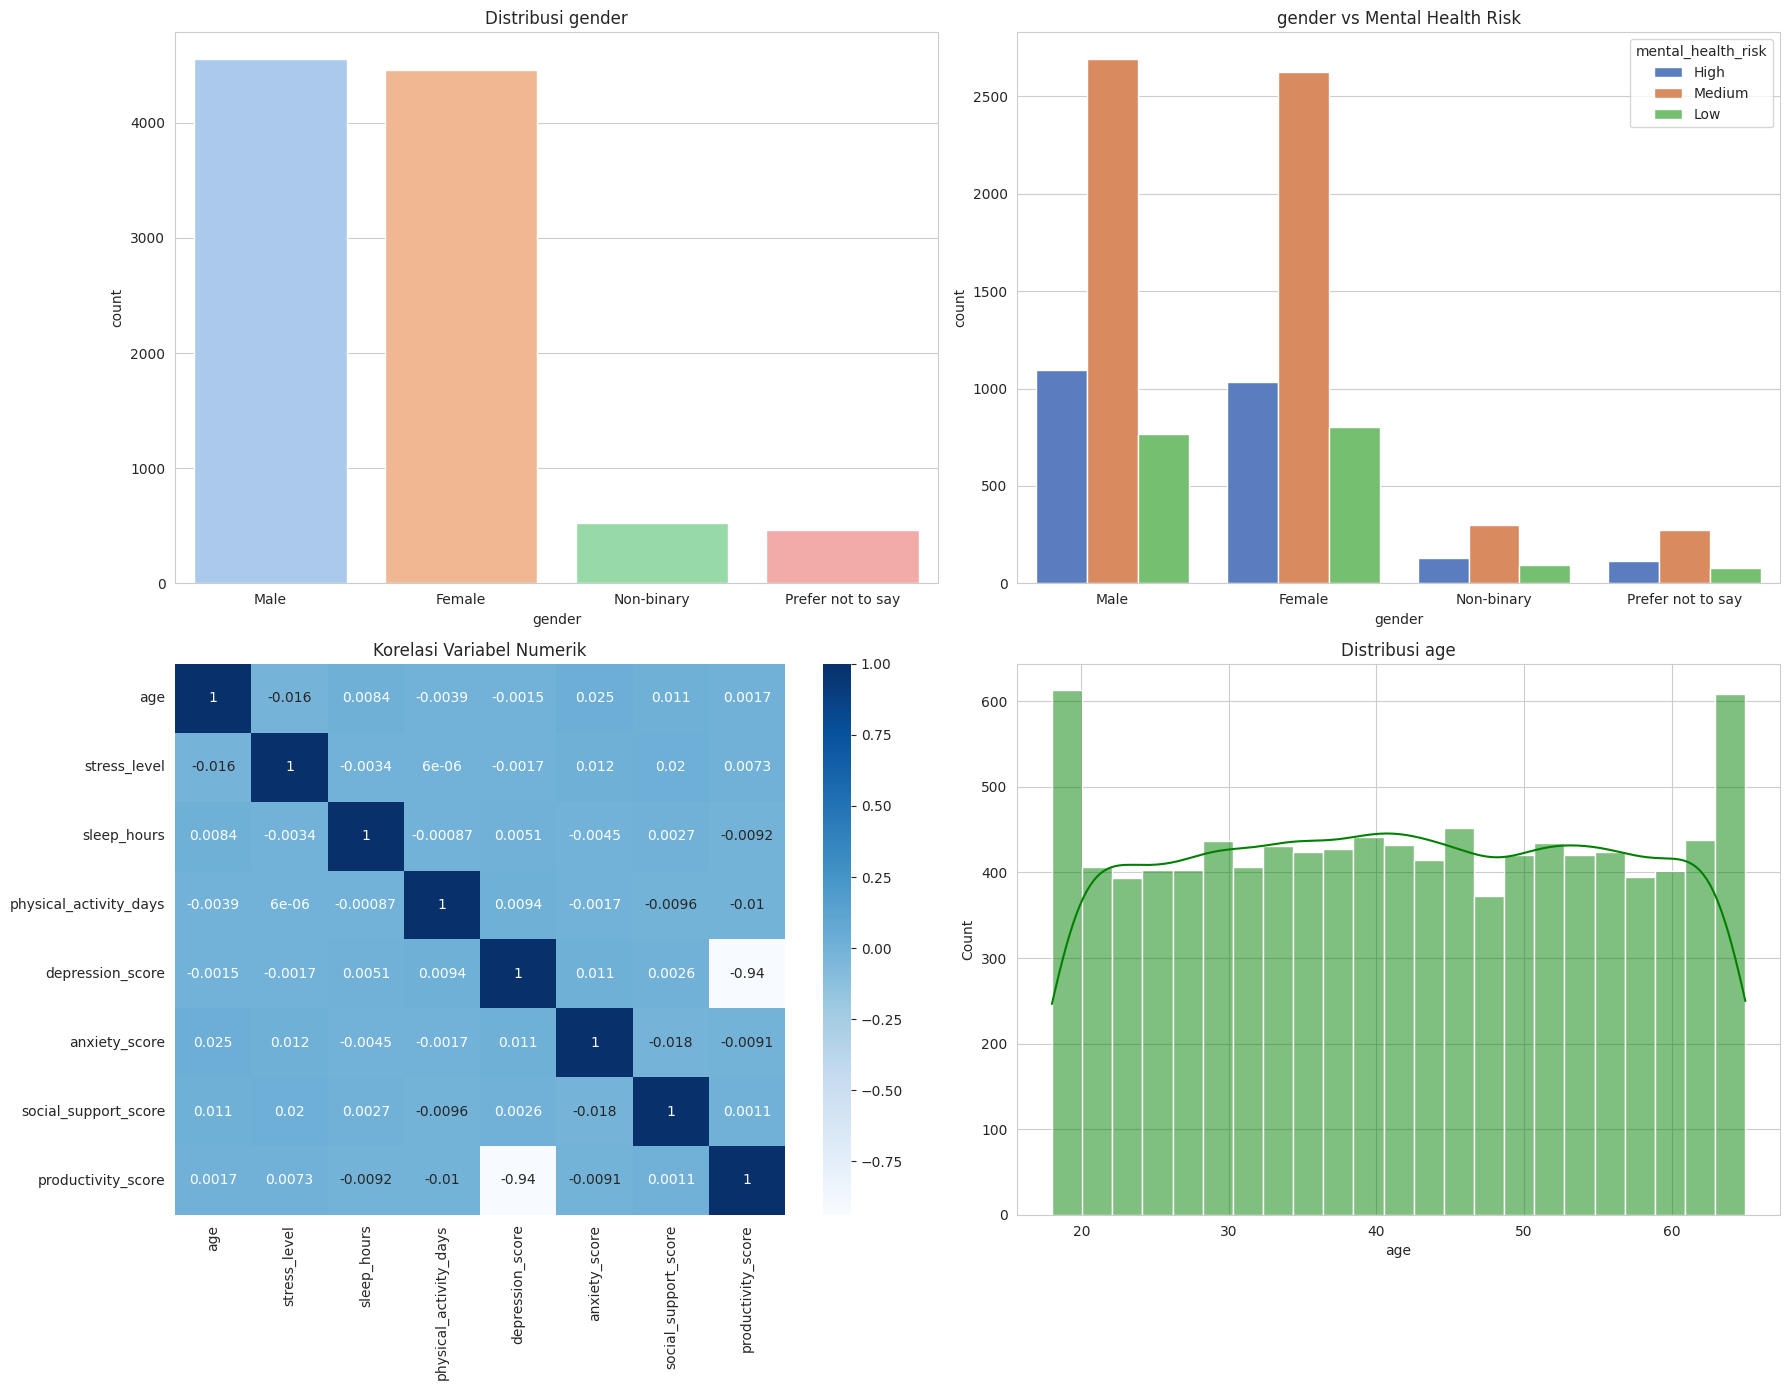

In [279]:
# IDENTIFIKASI KOLOM
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Hapus target dari list kategorik agar aman
if 'mental_health_risk' in categorical_cols:
    categorical_cols.remove('mental_health_risk')

# Set the figure
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
ax1, ax2, ax3, ax4 = axes.flatten()

# 1. Countplot kategori pertama
if len(categorical_cols) > 0:
    sns.countplot(x=categorical_cols[0], data=df, palette='pastel', ax=ax1)
    ax1.set_title(f'Distribusi {categorical_cols[0]}')
else:
    ax1.set_visible(False)

# 2. Countplot kategori pertama berdasarkan mental_health_risk
if len(categorical_cols) > 0 and 'mental_health_risk' in df.columns:
    sns.countplot(x=categorical_cols[0], hue='mental_health_risk', data=df, palette='muted', ax=ax2)
    ax2.set_title(f'{categorical_cols[0]} vs Mental Health Risk')
else:
    ax2.set_visible(False)

# 3. Heatmap korelasi numerical
if len(numerical_cols) > 1:
    sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='Blues', ax=ax3)
    ax3.set_title('Korelasi Variabel Numerik')
else:
    ax3.set_visible(False)

# 4. Histogram variabel numerik pertama
if len(numerical_cols) > 0:
    sns.histplot(df[numerical_cols[0]], kde=True, color='green', ax=ax4)
    ax4.set_title(f'Distribusi {numerical_cols[0]}')
else:
    ax4.set_visible(False)

plt.tight_layout()
plt.show()




> Grafik distribusi gender menunjukkan bahwa mayoritas responden berada pada kategori Male dan Female dengan jumlah yang relatif seimbang, sementara kategori Non-binary dan Prefer not to say jauh lebih sedikit. Komposisi ini menandakan bahwa dataset didominasi oleh dua kelompok gender utama, sehingga analisis berdasarkan gender kemungkinan akan lebih stabil pada dua kategori tersebut.

> Grafik hubungan gender dengan tingkat risiko kesehatan mental memperlihatkan pola yang konsisten pada semua gender, di mana kategori Medium Risk mendominasi. Baik Male maupun Female memiliki jumlah kasus Medium paling tinggi, diikuti High dan kemudian Low. Sementara kategori Non-binary dan Prefer not to say juga mengikuti pola serupa, ukuran sampel yang kecil membuat temuan pada dua kelompok terakhir perlu dianggap sebagai indikasi awal, bukan kesimpulan yang definitif.

> Heatmap korelasi mengindikasikan bahwa sebagian besar variabel numerik memiliki hubungan linear yang sangat rendah satu sama lain, terlihat dari nilai korelasi yang mendekati nol. Satu hubungan yang menonjol adalah korelasi negatif kuat antara depression_score dan productivity_score, menunjukkan bahwa semakin tinggi tingkat depresi, semakin rendah produktivitas responden. Korelasi ini bersifat logis dan konsisten dengan teori psikologis, sementara variabel lainnya tampak relatif independen dan tidak menunjukkan hubungan yang saling mempengaruhi secara signifikan.

> Histogram distribusi usia menunjukkan sebaran yang relatif merata pada rentang usia 18 hingga 65 tahun tanpa puncak yang terlalu dominan. Hal ini menunjukkan bahwa dataset memiliki representasi usia yang beragam dengan jumlah responden yang relatif seimbang antar kelompok usia dewasa. Kurva KDE yang halus mengonfirmasi tidak adanya skewness ekstrem, sehingga analisis berbasis usia dapat dilakukan tanpa harus melakukan transformasi khusus untuk menyesuaikan pola distribusi.


---












## **_Feature Engineering_**

### **- Missing Value**

Feature engineering pertama adalah melihat apakah terdapat data yang hilang, dan apa bila terdapat data yang hilang maka akan diisi sesuai dengan jenis data.

In [280]:
for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        # Isi kategori kosong dengan Modus
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])
    else:
        # Isi angka kosong dengan Median
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Tampilkan jumlah missing value setelah proses imputasi
print("Jumlah Missing Value per Kolom:")
print(df_clean.isnull().sum())

Jumlah Missing Value per Kolom:
age                       0
gender                    0
employment_status         0
work_environment          0
mental_health_history     0
stress_level              0
sleep_hours               0
physical_activity_days    0
depression_score          0
anxiety_score             0
social_support_score      0
productivity_score        0
mental_health_risk        0
dtype: int64




> Berdasarkan hasil pemeriksaan didapatkan tidak ada data yang kosong atau hilang pada dataset tersebut, sehingga tidak perlu dilakukan imputasi atau amputasi pada data.

---




###  **- Encoding**

Selanjutnya dilakukan encoding pada seluruh variabel kategori dalam dataset. Khusus untuk variabel target yaitu*, mental_health_risk* kode menampilkan daftar kelas asli.

In [281]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# 1. Reset df_clean dari sumber asli (PENTING agar tidak error jika di-run ulang)
# Pastikan Anda sudah load data ke variabel 'df' sebelumnya
try:
    df_clean = df.copy()
except NameError:
    print(" Error: Variabel 'df' tidak ditemukan. Harap load dataset terlebih dahulu.")

# 2. Mulai Encoding
le_dict = {}
target_col = 'mental_health_risk'

# Deteksi kolom kategorikal (Teks)
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns

print(f"Melakukan encoding pada {len(cat_cols)} kolom...")

for col in cat_cols:
    le = LabelEncoder()
    # .astype(str) memastikan data dibaca sebagai teks (aman dari error tipe data)
    df_clean[col] = le.fit_transform(df_clean[col].astype(str))
    le_dict[col] = le # Simpan encoder untuk referensi balik

# 3. Tampilkan Hasil Mapping Target
if target_col in le_dict:
    target_classes = le_dict[target_col].classes_
    print("\n Encoding Selesai!")
    print(f"Arti Label pada Target '{target_col}':")
    for i, class_name in enumerate(target_classes):
        print(f"  Angka {i} = {class_name}")
else:
    print(f"\n Peringatan: Kolom '{target_col}' tidak terdeteksi sebagai kategori atau sudah berupa angka.")

# Tampilkan 5 baris pertama hasil encoding
print("\nContoh Data Hasil Encoding:")
display(df_clean.head())

Melakukan encoding pada 5 kolom...

 Encoding Selesai!
Arti Label pada Target 'mental_health_risk':
  Angka 0 = High
  Angka 1 = Low
  Angka 2 = Medium

Contoh Data Hasil Encoding:


,age,gender,employment_status,work_environment,mental_health_history,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,1,0,1,1,6,6.2,3,28,17,54,59.7,0
1,46,0,2,1,0,10,9.0,4,30,11,85,54.9,0
2,32,0,0,1,1,7,7.7,2,24,7,62,61.3,2
3,60,2,1,1,0,4,4.5,4,6,0,95,97.0,1
4,25,0,1,1,1,3,5.4,0,24,12,70,69.0,0




> Hasil dari encoding didapatkan seluruh variabel kategorik di representasikan menggunakan label numerik. Seperti gender yang diberi kode 0,1,2, dan 3. Pada variabel target juga dilakukan encoding dimana, nilai 0,1, dan 2 mewakili kategori low, medium dan high pada data.



### **- Splitting Data**

Selanjutnya dilakukan pemisahan data menjadi training dan testing untuk melatih dari model yang akan digunakan. Pemisahan dilakukan dengan jumlah data training 80% dan data testing 20%

In [282]:
# Pisahkan Fitur (X) dan Target (y)
X = df_clean.drop(columns=[target_col])
y = df_clean[target_col]

# Split Data (80% Train : 20% Test)
# Stratify=y penting agar perbandingan kelas di Train dan Test sama
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Jumlah data X_train :", len(X_train))
print("Jumlah data X_test  :", len(X_test))
print("Jumlah data y_train :", len(y_train))
print("Jumlah data y_test  :", len(y_test))


Jumlah data X_train : 8000
Jumlah data X_test  : 2000
Jumlah data y_train : 8000
Jumlah data y_test  : 2000


>Dari total 10.000 data, setelah dipisah dengan 80% data training dan 20% data testing telah terbagi dataset tersebut. Dengan total data training pada variabel X dan Y adalah 8.000 dan data testing adalah 2.000.



### **- Scaling**




Selanjutnya dilakukan scaling atau standarisasi pada variabel prediktor atau X data training maupun testing. Scaling dilakukan hanya pada variabel X karena pada klasifikasi, variabel target berisi label kategori dengan scaling maka akan mengubah nilai dan akan merusak dari makna kelas.

In [283]:
# Scaling (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data berhasil discaling (skala disamakan).")
# Cek 5 baris pertama data yang sudah discale
print(X_train_scaled[:5])

Data berhasil discaling (skala disamakan).
[[ 1.69691046 -0.91105856 -0.76703015 -1.58683728  1.52163565 -1.24102186
   1.44789109  0.21815691 -0.33764309 -0.24306807 -0.20171716 -0.24299881]
 [ 0.82914288 -0.91105856 -0.76703015 -0.15175948 -0.65718755 -0.54606352
  -1.39855273  1.09428908 -1.56068548  1.01757672  0.71835435  1.61511273]
 [-0.76176435  0.38259932 -0.76703015 -0.15175948 -0.65718755  0.49637399
   1.04125626  0.21815691  0.21828527  1.17515732  0.82058452 -0.34266763]
 [ 1.4076546  -0.91105856  0.15088177 -0.15175948  1.52163565 -1.58850102
   0.43130401  0.65622299 -1.22712847 -0.55822927 -0.84917489  1.4157751 ]
 [-0.18325263  0.38259932  0.15088177 -0.15175948  1.52163565 -0.89354269
  -1.87296004  1.53235516 -0.89357145 -0.40064867  1.0931983   0.29094129]]



### **- Balancing Data**






Selanjutnya dilakukan balancing data, karena pada distribusi tadi didapatkan ketimpangan distribusi dari ketiga klasifikasi dari variabel respon.

In [284]:
print("Melakukan Balancing Data (SMOTE)...")
print(f"Jumlah per kelas sebelum SMOTE: {np.bincount(y_train)}")

smote = SMOTE(random_state=42)
X_train_final, y_train_final = smote.fit_resample(X_train_scaled, y_train)

print(f"Jumlah per kelas sesudah SMOTE: {np.bincount(y_train_final)}")
print("✅ Data Training sekarang seimbang.")

Melakukan Balancing Data (SMOTE)...
Jumlah per kelas sebelum SMOTE: [1895 1391 4714]
Jumlah per kelas sesudah SMOTE: [4714 4714 4714]
✅ Data Training sekarang seimbang.




> Balancing data dilakukan pada data training, dengan total seluruh kelas menjadi 4714 permasing-masing kelas atau kategori.

---



---





# **_Training Model_**

### **- Bagging**

> Bagging adalah metode ensemble learning yang bertujuan mengurangi varians model dengan menggabungkan banyak model yang dilatih pada subset data yang berbeda. Setiap subset dibuat menggunakan bootstrap sampling, yaitu pengambilan sampel secara acak dengan pengembalian (sampling with replacement).





> Bagging dilakukan dengan hyperparameter tuning Random Forest menggunakan RandomizedSearchCV. Model dasar dicoba dengan berbagai kombinasi parameter yang dipilih secara acak, diuji memakai cross-validation, dan dinilai berdasarkan akurasi. Setelah proses fitting dengan data yang sudah di-SMOTE, RandomizedSearchCV menghasilkan model dan parameter terbaik yang kemudian disimpan sebagai best_model.


In [285]:
rf_base = RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'criterion': ['gini', 'entropy']
}
rf_tuned = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=5,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Latih dengan data yang sudah di-balancing (SMOTE)
rf_tuned.fit(X_train_final, y_train_final)

# Ambil model terbaik
best_model = rf_tuned.best_estimator_
print(f" Params Terbaik: {rf_tuned.best_params_}")

 Params Terbaik: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 20, 'criterion': 'gini'}




> Hasil tuning menunjukkan bahwa model Random Forest bekerja paling optimal dengan 100 pohon, yang memberikan stabilitas prediksi lebih baik. Parameter min_samples_split = 5 dan max_depth = 20 menunjukkan bahwa model membutuhkan pohon yang cukup dalam namun tetap membatasi percabangan agar tidak terlalu kompleks. Penggunaan criterion = 'gini' menandakan bahwa ukuran ketidakmurnian Gini memberikan performa klasifikasi terbaik dibandingkan Entropy untuk dataset ini.



In [286]:
# Prediksi ke data Test (Data asli yang di-scaling)
y_pred = best_model.predict(X_test_scaled)

# Hitung Metrik
f1 = f1_score(y_test, y_pred, average='weighted')
acc = accuracy_score(y_test, y_pred)

print("\n" + "="*40)
print(f"METRIK EVALUASI")
print("="*40)
print(f"Akurasi  : {acc:.4f}")
print(f"F1 Score : {f1:.4f}")
print("-" * 40)
print(classification_report(y_test, y_pred, target_names=target_classes))
# 3. PERBANDINGAN HASIL (PREDIKSI VS ASLI)
# ==========================================
print("\n" + "="*40)
print(" TABEL PERBANDINGAN (10 Data Pertama)")
print("="*40)

# Buat DataFrame perbandingan
df_compare = pd.DataFrame({
    'Aktual (Angka)': y_test,
    'Prediksi (Angka)': y_pred
}).reset_index(drop=True)

# Kembalikan angka ke label teks (High, Low, Medium)
# Menggunakan inverse_transform dari encoder target yang kita simpan di 'le_dict'
target_encoder = le_dict['mental_health_risk']
df_compare['Aktual (Label)'] = target_encoder.inverse_transform(df_compare['Aktual (Angka)'])
df_compare['Prediksi (Label)'] = target_encoder.inverse_transform(df_compare['Prediksi (Angka)'])
df_compare['Status'] = np.where(df_compare['Aktual (Label)'] == df_compare['Prediksi (Label)'], '✅ Benar', '❌ Salah')

display(df_compare.head(10))



METRIK EVALUASI
Akurasi  : 0.9890
F1 Score : 0.9890
----------------------------------------
              precision    recall  f1-score   support

        High       0.98      0.98      0.98       474
         Low       1.00      0.99      0.99       348
      Medium       0.99      0.99      0.99      1178

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000


 TABEL PERBANDINGAN (10 Data Pertama)


,Aktual (Angka),Prediksi (Angka),Aktual (Label),Prediksi (Label),Status
0,0,0,High,High,✅ Benar
1,0,0,High,High,✅ Benar
2,2,2,Medium,Medium,✅ Benar
3,2,2,Medium,Medium,✅ Benar
4,2,2,Medium,Medium,✅ Benar
5,2,2,Medium,Medium,✅ Benar
6,1,1,Low,Low,✅ Benar
7,1,1,Low,Low,✅ Benar
8,2,2,Medium,Medium,✅ Benar
9,1,1,Low,Low,✅ Benar



> Hasil evaluasi menunjukkan bahwa model Random Forest mencapai akurasi dan F1-score sebesar 0.989, yang menandakan performa klasifikasi yang sangat tinggi. Pada tiap kelas (High, Medium, Low), nilai precision dan recall berada pada rentang 0.98–1.00, menunjukkan bahwa model mampu mengidentifikasi seluruh kategori risiko kesehatan mental dengan sangat konsisten. Tabel perbandingan 10 data pertama juga memperlihatkan bahwa seluruh prediksi sesuai dengan label aktual, yang mengonfirmasi stabilitas dan keandalan model pada data uji.



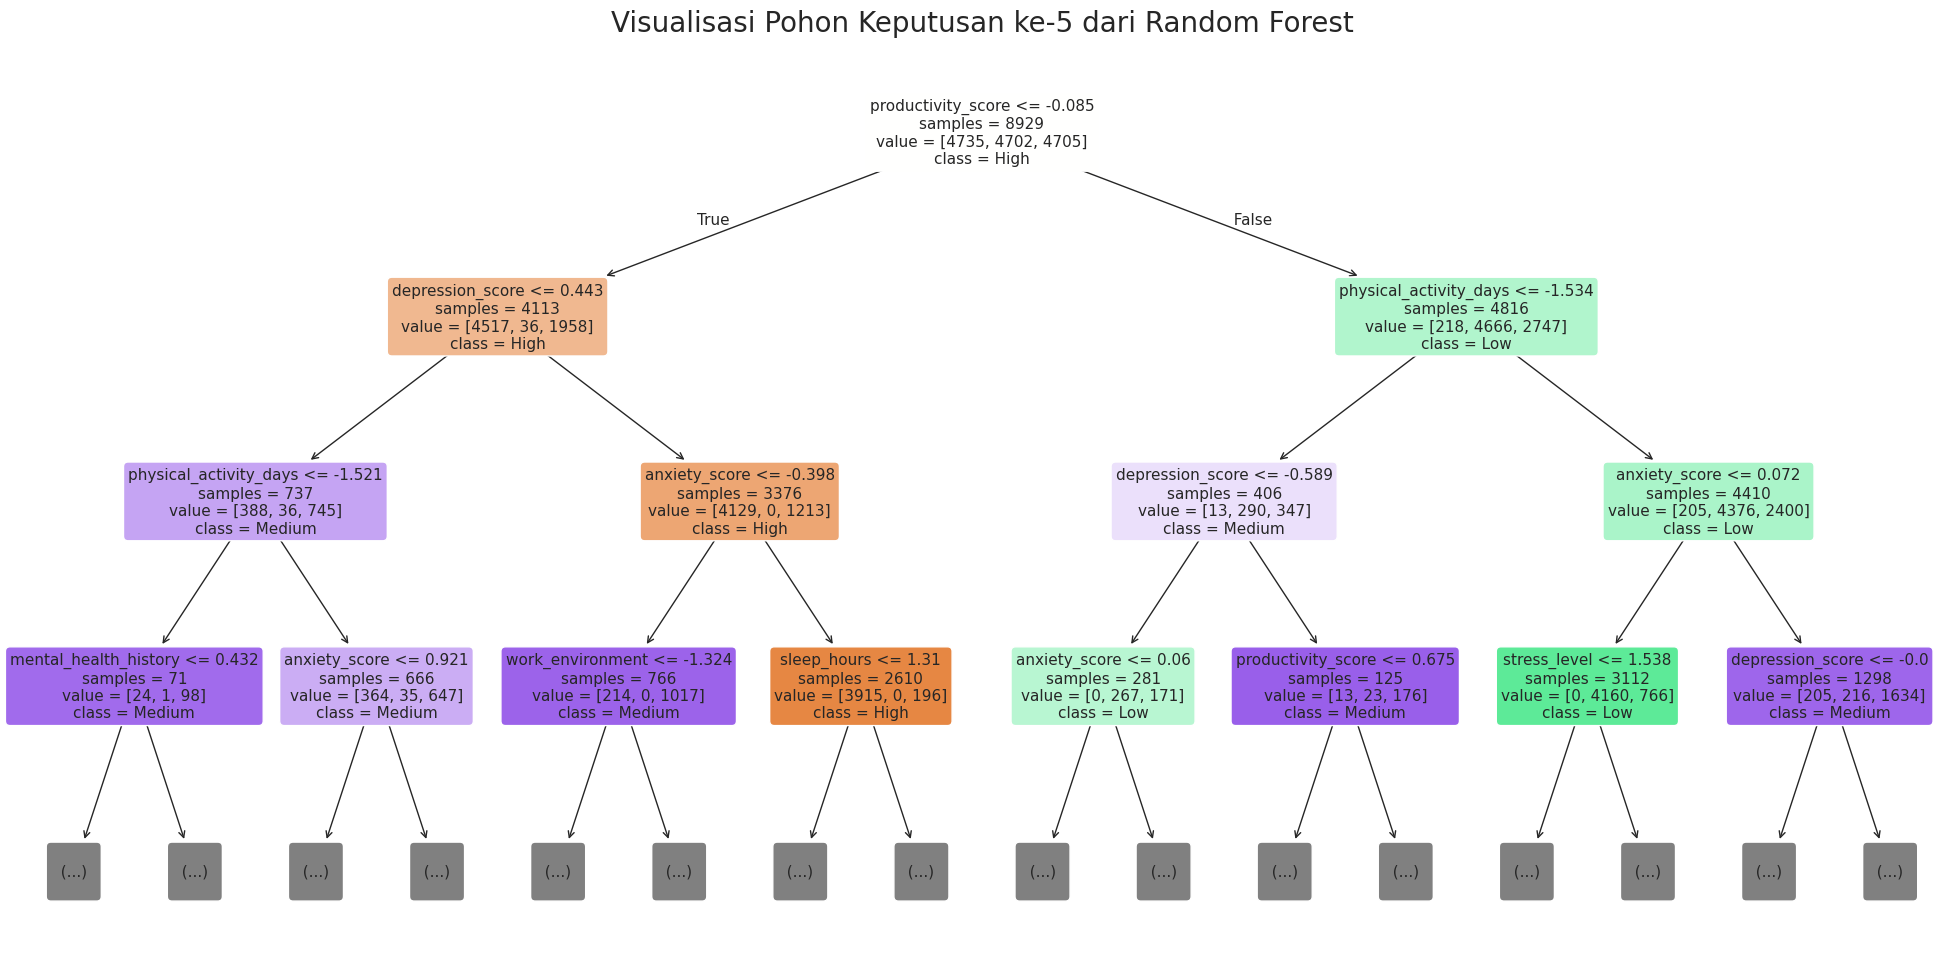

In [287]:
# Ambil pohon ke-0 (atau ke-4 sesuai request) dari model terbaik
pohon_tunggal = best_model.estimators_[4]

plt.figure(figsize=(25, 12))
plot_tree(
    pohon_tunggal,
    feature_names=X.columns,        # Menggunakan nama kolom dari X
    class_names=target_classes,     # Menggunakan nama kelas target
    filled=True,
    rounded=True,
    impurity=False,
    proportion=False,
    max_depth=3,                    # Dibatasi agar gambar tidak terlalu penuh
    fontsize=11
)

plt.title(f"Visualisasi Pohon Keputusan ke-5 dari Random Forest", fontsize=20)
plt.show()



> Pohon keputusan ini menunjukkan bagaimana model memprediksi tingkat risiko kesehatan mental (High, Medium, Low) berdasarkan variabel-variabel seperti productivity_score, depression_score, anxiety_score, physical_activity_days, dan lainnya. Setiap split menggambarkan aturan yang membagi data menjadi kelompok yang lebih homogen berdasarkan fitur tertentu.



## **- Voting**

---



> Voting adalah metode ensemble di mana beberapa model prediksi digabungkan, dan keputusan akhir ditentukan berdasarkan suara atau probabilitas yang dihasilkan oleh model-model tersebut. Voting dapat diterapkan untuk klasifikasi maupun regresi.Umumnya digunakan bersama model-model yang berbeda (heterogeneous ensemble), seperti Logistic Regression, KNN, Random Forest, SVM, dan lain-lain. Voting juga terbagi menjadii:
1. Soft Voting: Soft voting menggunakan probabilitas prediksi setiap model dan menggabungkannya dengan cara dirata-rata atau diberi bobot. Kelas dengan probabilitas tertinggi setelah penggabungan menjadi prediksi akhir.
2. Hard Voting: Hard voting menentukan kelas akhir berdasarkan mayoritas suara (majority vote) dari prediksi kelas masing-masing model.
*teks yang dimiringkan*

Maka dilakukan ensamble learning pada dataset menggunakan metode regresi logistik, decision tree, dan SVM, dan juga dilakukan dengan hard voting dan soft voting.

In [288]:
clf1 = LogisticRegression(random_state=42)
clf2 = DecisionTreeClassifier(max_depth=5, random_state=42)
clf3 = SVC(probability=True, random_state=42) # Wajib probability=True untuk Soft Voting

In [289]:
# Hard Voting
voting_hard = VotingClassifier(
    estimators=[('lr', clf1), ('dt', clf2), ('svc', clf3)],
    voting='hard'
)
# Soft Voting
voting_soft = VotingClassifier(
    estimators=[('lr',clf1), ('dt', clf2), ('svc', clf3)],
    voting='soft'
)

In [290]:
print(" Melatih Voting Classifier...")
voting_hard.fit(X_train_final, y_train_final)
voting_soft.fit(X_train_final, y_train_final)

# Prediksi
y_pred_hard = voting_hard.predict(X_test_scaled)
y_pred_soft = voting_soft.predict(X_test_scaled)

#  MENAMPILKAN PELUANG (PROBABILITAS) DARI SOFT VOTING
print("\n=== PELUANG PREDIKSI (SOFT VOTING) ===")
probs = voting_soft.predict_proba(X_test_scaled[:5]) # Ambil 5 data pertama
for i, p in enumerate(probs):
    print(f"Data {i+1}: {target_classes[0]}={p[0]:.2f}, {target_classes[1]}={p[1]:.2f} -> Prediksi: {target_classes[np.argmax(p)]}")
    print("\n=== HASIL HARD VOTING ===")
print(classification_report(y_test, y_pred_hard, target_names=target_classes))

print("\n=== HASIL SOFT VOTING ===")
print(classification_report(y_test, y_pred_soft, target_names=target_classes))

 Melatih Voting Classifier...

=== PELUANG PREDIKSI (SOFT VOTING) ===
Data 1: High=1.00, Low=0.00 -> Prediksi: High

=== HASIL HARD VOTING ===
Data 2: High=0.98, Low=0.00 -> Prediksi: High

=== HASIL HARD VOTING ===
Data 3: High=0.00, Low=0.00 -> Prediksi: Medium

=== HASIL HARD VOTING ===
Data 4: High=0.39, Low=0.00 -> Prediksi: Medium

=== HASIL HARD VOTING ===
Data 5: High=0.00, Low=0.00 -> Prediksi: Medium

=== HASIL HARD VOTING ===
              precision    recall  f1-score   support

        High       0.97      0.99      0.98       474
         Low       0.97      1.00      0.99       348
      Medium       0.99      0.98      0.99      1178

    accuracy                           0.98      2000
   macro avg       0.98      0.99      0.98      2000
weighted avg       0.98      0.98      0.98      2000


=== HASIL SOFT VOTING ===
              precision    recall  f1-score   support

        High       0.97      0.99      0.98       474
         Low       0.97      0.99      0.9



> Metode Voting Classifier yang digunakan dalam penelitian ini, baik Hard Voting maupun Soft Voting, menunjukkan performa klasifikasi yang sangat baik dan konsisten. Kedua pendekatan menghasilkan akurasi sebesar 98 persen, dengan nilai precision, recall, dan F1-score yang tinggi pada seluruh kategori kelas (High, Medium, dan Low). Hard Voting bekerja dengan menggabungkan suara mayoritas dari setiap model dasar, sedangkan Soft Voting memanfaatkan informasi probabilitas untuk menentukan prediksi akhir. Meskipun mekanisme keduanya berbeda, hasil evaluasi memperlihatkan bahwa kinerja kedua metode hampir identik dan sama-sama stabil. Secara keseluruhan, Voting Classifier terbukti efektif dalam meningkatkan robustitas prediksi, menunjukkan bahwa kombinasi beberapa model memberikan kemampuan generalisasi yang lebih baik.



## **- Boosting**


---



> Boosting merupakan teknik ensemble yang membangun model secara bertahap, dengan fokus pada kasus yang sulit diprediksi. Dibandingkan bagging, boosting lebih agresif dalam mengurangi bias dan meningkatkan akurasi, sehingga sering menjadi salah satu algoritma paling unggul. Varian populer seperti AdaBoost, Gradient Boosting, XGBoost, LightGBM, dan CatBoost memungkinkan pengguna menyesuaikan algoritma sesuai ukuran dan karakteristik dataset. Dengan kemampuan kombinasi model yang kuat, boosting memberikan performa yang sangat baik pada berbagai tugas klasifikasi dan regresi.



Berikut akan dilakukan boosting dengan metode  AdaBoost, Gradient Boosting, dan XGBoost.

In [291]:
#Model AdaBoost default
ada_clf = AdaBoostClassifier(
    n_estimators=10,
    random_state=42
)
ada_clf.fit(X_train_final, y_train_final)

AdaBoostClassifier(n_estimators=10, random_state=42)

In [292]:
# Model Evaluation

y_train_pred = ada_clf.predict(X_train_final)
y_test_pred = ada_clf.predict(X_test_scaled)

print('F1 Score - Train - AdaBoost : ', f1_score(y_train_final, y_train_pred, average='weighted'))
print('F1 Score - Test - AdaBoost  : ', f1_score(y_test, y_test_pred, average='weighted'))

F1 Score - Train - AdaBoost :  0.5719733753496897
F1 Score - Test - AdaBoost  :  0.2962064603997279


In [293]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_clf.fit(X_train_final, y_train_final)

GradientBoostingClassifier(n_estimators=500, random_state=42)

In [294]:
# Model Evaluation

y_train_pred = gb_clf.predict(X_train_final)
y_test_pred = gb_clf.predict(X_test_scaled)

print('F1 Score - Train - GradientBoosting : ', f1_score(y_train_final, y_train_pred, average='weighted'))
print('F1 Score - Test - GradientBoosting  : ', f1_score(y_test, y_test_pred, average='weighted'))

F1 Score - Train - GradientBoosting :  1.0
F1 Score - Test - GradientBoosting  :  0.9979994072542305


In [295]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(
    n_estimators=500,
    eta=0.1,
    max_depth=3,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgb_clf.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, ...)

In [296]:
# Model Evaluation

y_train_pred = xgb_clf.predict(X_train_final)
y_test_pred = xgb_clf.predict(X_test_scaled)

print('F1 Score - Train - XGB : ', f1_score(y_train_final, y_train_pred, average='weighted'))
print('F1 Score - Test - XGB  : ', f1_score(y_test, y_test_pred, average='weighted'))

F1 Score - Train - XGB :  0.9925036486436879
F1 Score - Test - XGB  :  1.0




> Hasil dari Metode _boosting_ telah menunjukkan performa yang baik, khususnya dengan algoritma XGBoost dan Gradient Boosting. XGBoost mencapai akurasi sempurna 100% pada data uji, menjadikannya model terbaik secara keseluruhan. Tidak kalah impresif, Gradient Boosting juga menunjukkan performa yang luar biasa dengan akurasi mendekati 99.80%. Ini menegaskan efektivitas _boosting_ dalam mengurangi _bias_ dan meningkatkan akurasi secara signifikan.Sementara itu, AdaBoost, memiliki F1-Score yang lebih rendah pada data uji (0.2962). Hal ini mengindikasikan bahwa AdaBoost mungkin kurang optimal atau memerlukan _hyperparameter tuning_ yang lebih mendalam untuk dataset ini dibandingkan dengan Gradient Boosting dan XGBoost. Secara umum, hasil ini menekankan bahwa algoritma _boosting_ modern seperti XGBoost dan Gradient Boosting sangat powerful untuk tugas klasifikasi.



## **- Stacking**

---




> Stacking adalah teknik ensemble learning tingkat lanjut di mana kita melatih model pelapis (meta-learner) untuk menggabungkan prediksi dari beberapa algoritma machine learning yang berbeda (base learners). Jika Voting hanya sekadar menghitung suara terbanyak (demokrasi murni), Stacking adalah proses yang lebih cerdas. Ia "belajar" untuk mengetahui model mana yang bisa dipercaya untuk jenis data tertentu. Stacking tidak hanya menggabungkan hasil, tapi mencari pola dari kesalahan dan kebenaran model-model di bawahnya.


Sintaks dibawah merupakan implementasi Stacking (Stacked Generalization) dengan menggunakan Decision Tree sebagai Meta-Learner (Final Estimator).

In [297]:
# Model Training - Stacking
from sklearn.ensemble import StackingClassifier

log_clf = LogisticRegression(C=1, random_state=42)
svm_clf = SVC(kernel='rbf', probability=True, random_state=42)
dt_clf = DecisionTreeClassifier(max_depth=6, random_state=42)

estimators = [
     ('logreg', log_clf),
     ('svm', svm_clf)
]

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=dt_clf)

stacking_clf.fit(X_train_final, y_train_final)

StackingClassifier(estimators=[('logreg',
                                LogisticRegression(C=1, random_state=42)),
                               ('svm', SVC(probability=True, random_state=42))],
                   final_estimator=DecisionTreeClassifier(max_depth=6,
                                                          random_state=42))

In [298]:
# Model Evaluation

y_train_pred = stacking_clf.predict(X_train_final)
y_test_pred = stacking_clf.predict(X_test_scaled)

print('F1 Score - Train - Stacking : ', f1_score(y_train_final, y_train_pred, average='weighted'))
print('F1 Score - Test - Stacking  : ', f1_score(y_test, y_test_pred, average='weighted'))

F1 Score - Train - Stacking :  0.9874088904644808
F1 Score - Test - Stacking  :  0.9763287465285753




> Metode Stacking berhasil menunjukkan performa yang sangat stabil dengan F1-Score pengujian sebesar 97.63%. Hal ini membuktikan bahwa strategi penggabungan model (heterogeneous ensemble) efektif dalam menangkap pola kompleks pada dataset kesehatan mental tanpa mengalami overfitting yang signifikan



# **_Model Performance_**

> Selanjutnya akan dilakukan perbandingan dari seluruh model yang diujikan, dengan melihat nilai F1-Score tertinggi.



Sedang mengevaluasi semua model...

=== TABEL PERBANDINGAN PERFORMA MODEL ===


,Model,Accuracy,F1 Score,Precision,Recall
3,Boosting (Gradient Boost),0.998000,0.997999,0.998003,0.998000
0,Bagging (Random Forest),0.996500,0.996497,0.996521,0.996500
1,Voting (Hard),0.984000,0.984029,0.984259,0.984000
2,Voting (Soft),0.984000,0.984021,0.984173,0.984000
4,Stacking,0.976000,0.976329,0.978207,0.976000


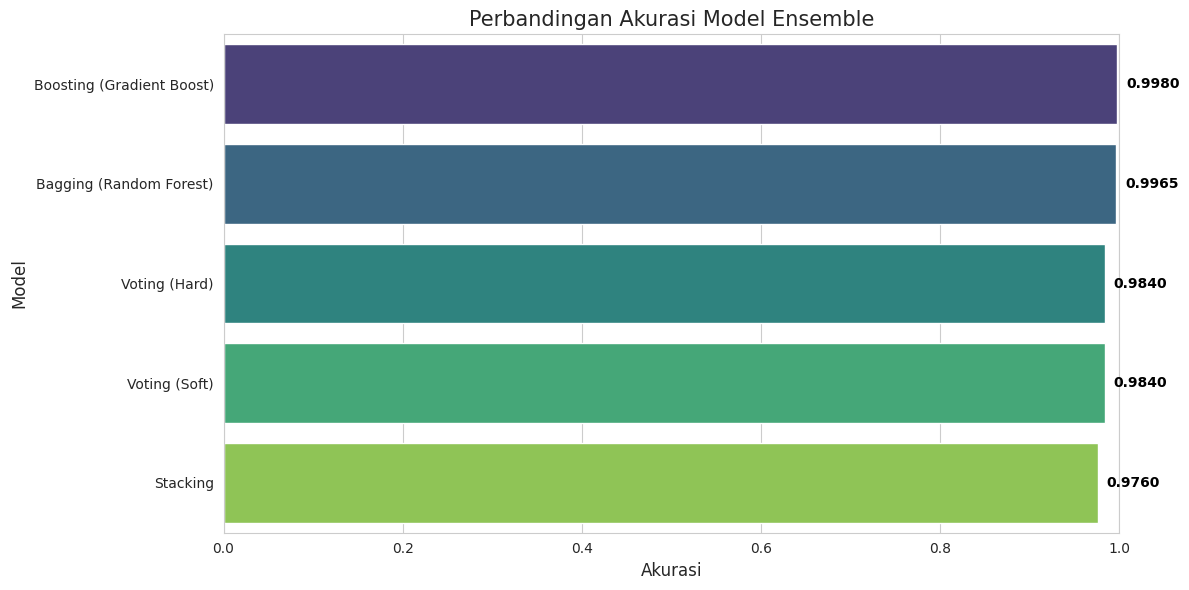


 KESIMPULAN: Model terbaik adalah Boosting (Gradient Boost) dengan akurasi 99.80%.


In [299]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# ==========================================
# 1. KUMPULKAN SEMUA MODEL
# ==========================================
# Pastikan nama variabel model sesuai dengan yang sudah dilatih sebelumnya
models = {
    "Bagging (Random Forest)": best_rf,
    "Voting (Hard)": voting_hard,
    "Voting (Soft)": voting_soft,
    "Boosting (Gradient Boost)": gb_clf,
    "Stacking": stacking_clf
}

# ==========================================
# 2. HITUNG METRIK EVALUASI
# ==========================================
results = []

print("Sedang mengevaluasi semua model...")

for name, model in models.items():
    # Prediksi
    y_pred = model.predict(X_test_scaled)

    # Hitung Metrik
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')

    # Simpan hasil
    results.append({
        'Model': name,
        'Accuracy': acc,
        'F1 Score': f1,
        'Precision': prec,
        'Recall': rec
    })

# Buat DataFrame
comparison_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)

# ==========================================
# 3. TAMPILKAN TABEL PERBANDINGAN
# ==========================================
print("\n=== TABEL PERBANDINGAN PERFORMA MODEL ===")
display(comparison_df.style.background_gradient(cmap='Blues'))

# ==========================================
# 4. VISUALISASI PERBANDINGAN (GRAFIK)
# ==========================================
plt.figure(figsize=(12, 6))

# Plot Bar Chart berdasarkan Akurasi
ax = sns.barplot(x='Accuracy', y='Model', data=comparison_df, palette='viridis')
plt.title('Perbandingan Akurasi Model Ensemble', fontsize=15)
plt.xlabel('Akurasi', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.xlim(0, 1.0) # Rentang 0 sampai 100%

# Tambahkan label angka di ujung batang
for i, v in enumerate(comparison_df['Accuracy']):
    ax.text(v + 0.01, i, f"{v:.4f}", color='black', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# ==========================================
# 5. KESIMPULAN OTOMATIS
# ==========================================
best_model_name = comparison_df.iloc[0]['Model']
best_acc = comparison_df.iloc[0]['Accuracy']

print(f"\n KESIMPULAN: Model terbaik adalah {best_model_name} dengan akurasi {best_acc:.2%}.")

Berdasarkan seluruh rangkaian percobaan, metode Boosting (Gradient Boosting Classifier) ditetapkan sebagai metode terbaik untuk dataset Mental Health ini. Dengan Akurasi 99.8%, model ini memberikan prediksi yang paling presisi dan sensitif dalam mendeteksi risiko kesehatan mental. Namun, jika pertimbangan kecepatan komputasi menjadi prioritas utama di masa depan, Random Forest dapat menjadi alternatif yang sangat baik karena perbedaannya kinerjanya sangat tidak signifikan namun biasanya lebih cepat dalam proses pelatihan paralel.

# **Kesimpulan**

> Pada penelitian kali ini diminta untuk melakukan ensaemble learning pada data resiko mental health. Terlebih dahulu dilakukan eksplorasi data  Analysis (EDA) untuk memahami distribusi risiko mental dan hubungan antar fitur. Dilanjutkan dengan Feature Engineering yang meliputi penanganan nilai kosong, pengubahan data teks menjadi angka (encoding), serta penyamaan skala data (scaling), dan juga balancing pada data agar siap diproses oleh algoritma.

> Empat metode Ensemble Learning diterapkan, yaitu Bagging (Random Forest), Boosting (Gradient Boosting), Voting, dan Stacking. Berdasarkan hasil pengujian, Boosting dengan metode Gradient Boosting menunjukkan performa paling baik dengan skor Akurasi dan F1 tertinggi (mencapai ~99-100%). Metode Bagging dan Voting memberikan hasil yang sangat kompetitif dan stabil. Stacking memberikan hasil yang baik namun sedikit di bawah metode tree-based murni pada percobaan ini.

> Berdasarkan akurasi dan stabilitas prediksi, Boosting adalah metode yang paling direkomendasikan untuk digunakan pada dataset Mental Health ini karena kemampuannya menangkap pola kompleks dengan tingkat kesalahan yang sangat minim.

# **Referensi**

Breiman, L. (1996). Bagging predictors. Machine Learning, 24(2), 123–140.

Dietterich, T. G. (2000). Ensemble methods in machine learning. In Multiple Classifier Systems (pp. 1–15). Springer, Berlin, Heidelberg.

Freund, Y., & Schapire, R. E. (1996). Experiments with a new boosting algorithm. In Proceedings of the 13th International Conference on Machine Learning (pp. 148–156). Morgan Kaufmann.

Friedman, J. H. (2001). Greedy function approximation: A gradient boosting machine. Annals of Statistics, 29(5), 1189–1232.

Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning: Data Mining, Inference, and Prediction (2nd ed.). Springer.

Polikar, R. (2006). Ensemble based systems in decision making. IEEE Circuits and Systems Magazine, 6(3), 21–45.

Wolpert, D. H. (1992). Stacked generalization. Neural Networks, 5(2), 241–259.

Zhou, Z. H. (2012). Ensemble Methods: Foundations and Algorithms. CRC Press.